In [5]:
#programos como se estivesse em um ambiente de desenvolvimento.
import pandas as pd # biblioteca para análise de dados em python
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
#import seaborn as sns #biblioteca para auxilio na visualização dos dados
import json
#sns.set(style="darkgrid")
df = pd.read_csv('posts_details_haddad.tsv', sep='\t') # le o arquivo - separador é o \t
df.head() # exibe as primeiras 5 linhas do arquivo

,post_id,date,num_likes,num_angry,num_shares
0,904277726319518_2878974912183113,2020-02-29T11:23:27+0000,4996,58,818
1,904277726319518_2878783568868914,2020-02-29T09:21:22+0000,2602,19,477
2,904277726319518_2875616525852285,2020-02-28T00:14:25+0000,3068,20,540
3,904277726319518_2872245456189392,2020-02-26T12:12:56+0000,3148,616,1068
4,904277726319518_2871255852955019,2020-02-26T00:58:59+0000,21619,77,1369


In [6]:
df.columns = ['Id', 'Data', 'Likes', 'Angry', 'Shares'] #muda como o lable da coluna é exibido
df.tail(10) #exibe os últimos elementos do arquivo

,Id,Data,Likes,Angry,Shares
1870,904277726319518_952757028138254,2015-10-29T21:36:12+0000,2291,0,1003
1871,904277726319518_952274221519868,2015-10-28T22:30:00+0000,480,0,51
1872,904277726319518_952294264851197,2015-10-28T21:21:15+0000,524,0,54
1873,904277726319518_951794714901152,2015-10-27T17:56:53+0000,1043,0,46
1874,904277726319518_951679671579323,2015-10-27T11:51:14+0000,2163,0,166
1875,904277726319518_951500671597223,2015-10-26T22:55:36+0000,482,0,114
1876,904277726319518_951472934933330,2015-10-26T21:07:23+0000,215,0,14
1877,904277726319518_951471134933510,2015-10-26T21:02:45+0000,488,0,115
1878,904277726319518_951480754932548,2015-10-26T21:39:03+0000,291,0,49
1879,904277726319518_947476378666319,2015-10-16T21:25:59+0000,341,0,0


In [7]:
df.dtypes # exibe o tipo de cada um dos campos

Id        object
Data      object
Likes      int64
Angry      int64
Shares     int64
dtype: object

In [8]:
# converte o tipo data que está como string em ojbeto no formato data
df["date_time"] = pd.to_datetime(df['Data'])

In [11]:
x = df["date_time"]
y = df.Likes
#criação da função que irá plotar o scatterplot
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.scatter(x, y)
    ax.margins(x=0, y=0)

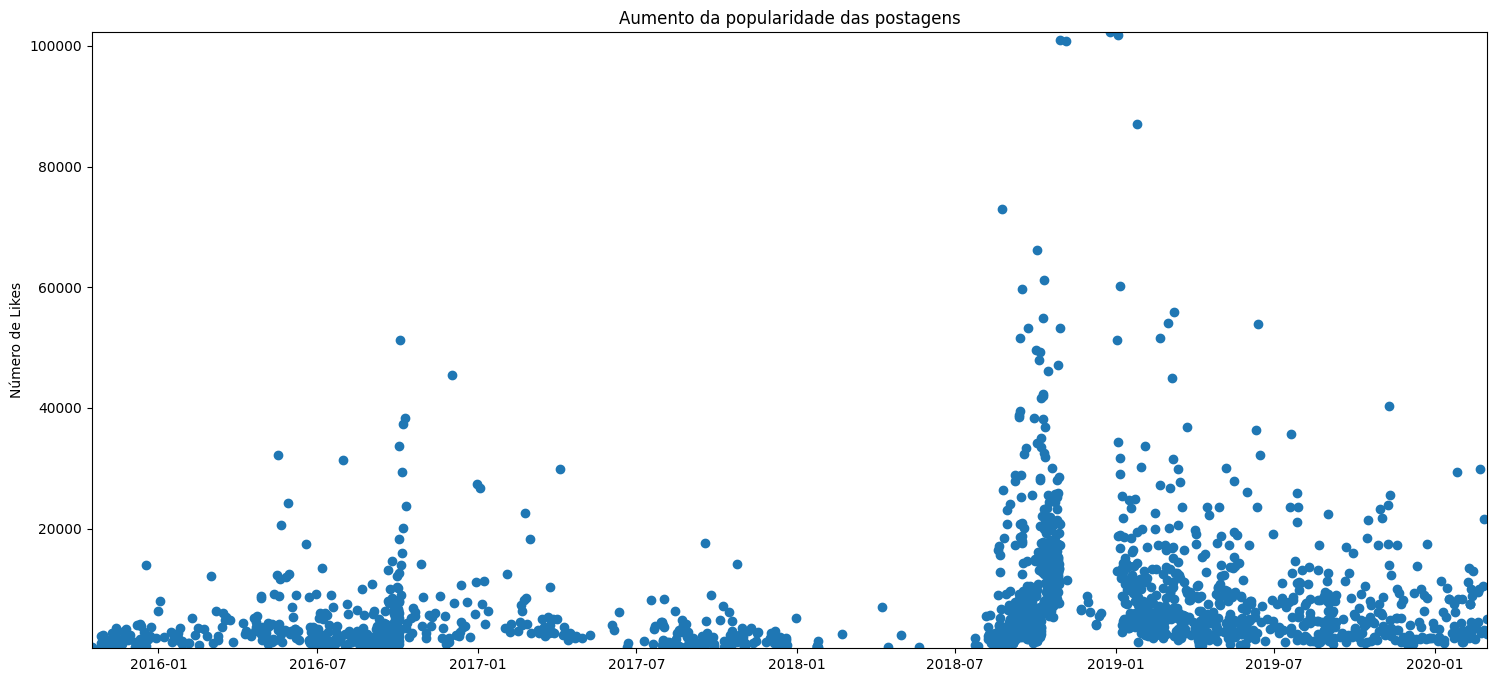

In [12]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
plot(x, y, ax, 'Aumento da popularidade das postagens', 'Número de Likes')

date_time  date_time
2015       10             893.000000
           11            1328.888889
           12            2400.652174
2016       1             2408.153846
           2             2449.000000
           3             4465.090909
           4             4118.066667
           5             6796.620690
           6             3607.482759
           7             4454.482759
           8             2525.619048
           9             2567.293478
           10            9315.941176
           11            3608.714286
           12            9830.500000
2017       1             9948.333333
           2             7369.666667
           3             5062.857143
           4             5113.454545
           5             2428.000000
           6             2980.600000
           7             3042.200000
           8             2382.961538
           9             2585.047619
           10            2614.481481
           11            2070.500000
           12    

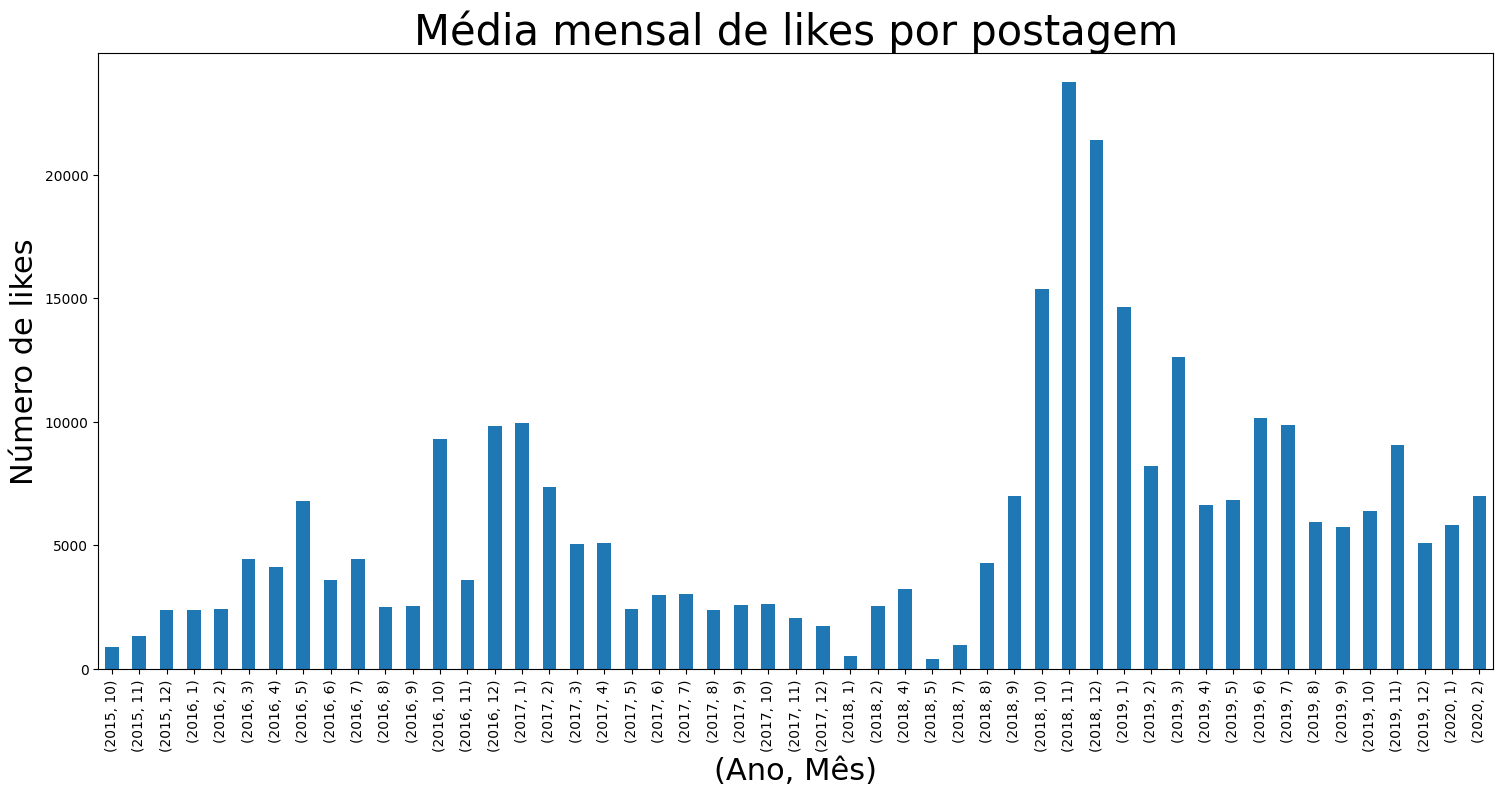

In [13]:
################ Análise da média mensal de likes por postagem ################
# agrupamento por colunas (similar ao acesso a banco de dados)
# material adicional sobre agrupamento - https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Likes"].mean()
print(group_by_month)
axes = group_by_month.plot(kind='bar')
#axex = group_by_month[:70].plot(kind='bar') # é possível limitar a quantidade de elementos que será exibida
axes.set_title('Média mensal de likes por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de likes',fontsize=22)
plt.show()

#a figura pode ser salva no diretório que se encontra o notebook
fig = axes.get_figure()
fig.savefig('media_likes.jpg')

0        4996
1        2602
2        3068
3        3148
4       21619
        ...  
1875      482
1876      215
1877      488
1878      291
1879      341
Name: Likes, Length: 1880, dtype: int64


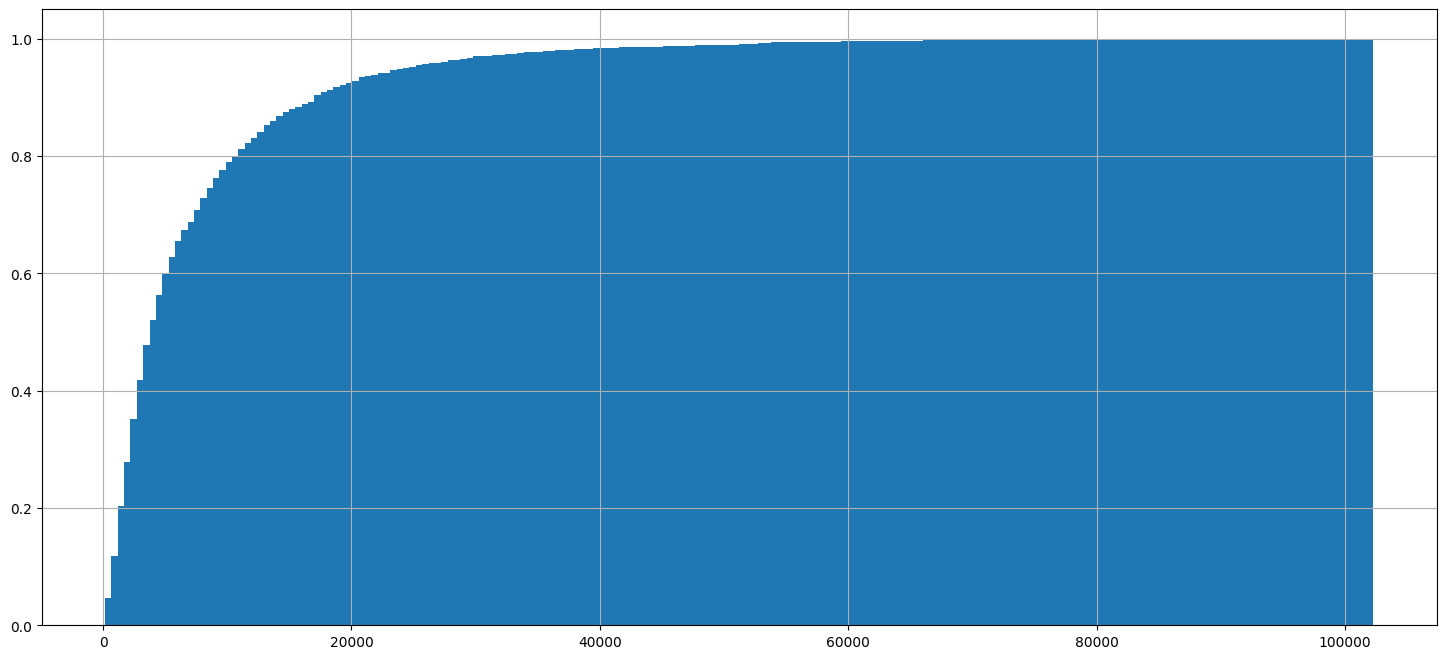

In [14]:
#################### CDF do número de likes #####################
like_series = pd.Series(df['Likes'])
print (like_series)
like_series.hist(cumulative=True, density=1, bins=200)
plt.show()

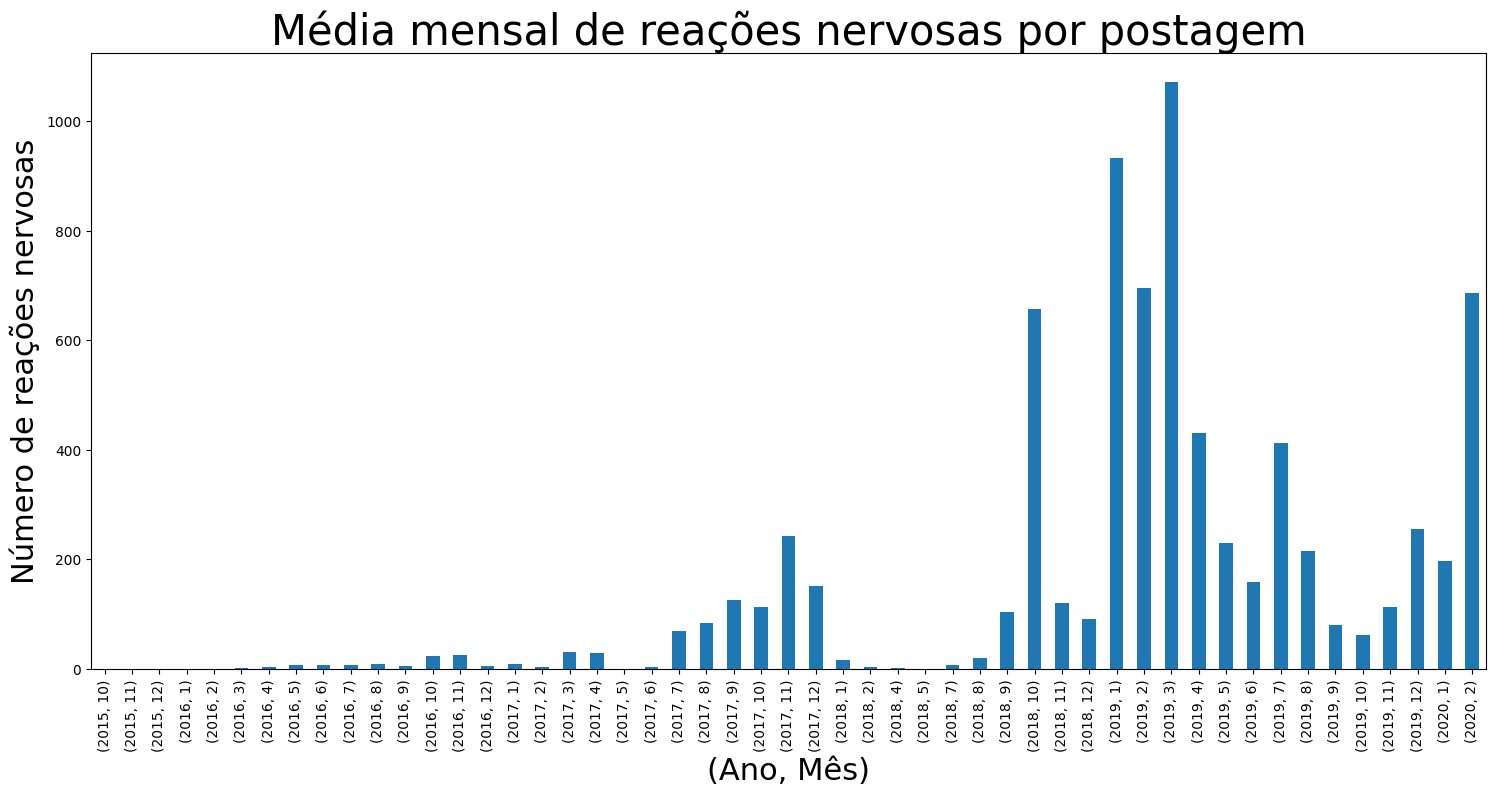

In [15]:
################ Análise da média mensal de reações bravas (angry) por postagem ################
group_by_month = df.groupby([df["date_time"].dt.year, df["date_time"].dt.month])["Angry"].mean()
axes = group_by_month.plot(kind='bar')
axes.set_title('Média mensal de reações nervosas por postagem',fontsize=30)
axes.set_xlabel('(Ano, Mês)',fontsize=22)
axes.set_ylabel('Número de reações nervosas',fontsize=22)
plt.show()

0        58
1        19
2        20
3       616
4        77
       ... 
1875      0
1876      0
1877      0
1878      0
1879      0
Name: Angry, Length: 1880, dtype: int64


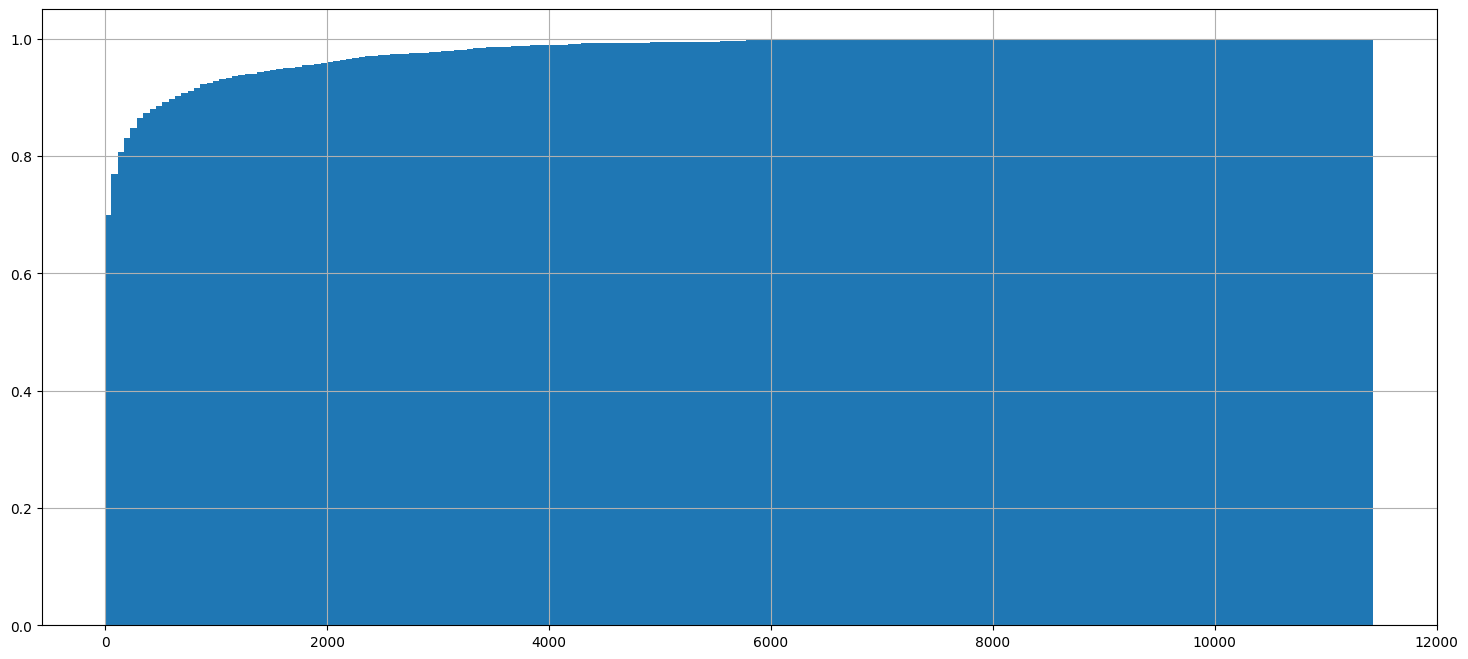

In [16]:
#################### CDF do número de angries #####################
like_series = pd.Series(df['Angry'])
print (like_series)
like_series.hist(cumulative=True, density=1, bins=200)
plt.show()

In [18]:
##################### Análise exploratória - quais postagens com mais reações nervosas? ###################
# carregar novo dataframe com comentários
df_comments = pd.read_csv('posts_details_comments_haddad.tsv', sep='\t') # le o arquivo - separador é o \t
df_comments.head() # exibe as primeiras 5 linhas do arquivo

,post_id,date,message,num_likes,num_angry,num_shares
0,904277726319518_2878974912183113,2020-02-29T11:23:27+0000,Bolsonav\u00edrus: nada mais err\u00f4neo do q...,4996,58,818
1,904277726319518_2878783568868914,2020-02-29T09:21:22+0000,Bolsonav\u00edrus: nada mais err\u00f4neo do q...,2602,19,477
2,904277726319518_2875616525852285,2020-02-28T00:14:25+0000,"Cristiano Zanin, advogado de Lula, e Fernando ...",3068,20,540
3,904277726319518_2872245456189392,2020-02-26T12:12:56+0000,"NEM DISNEY, NEM P\u00c3O\nH\u00e1 um ano, gove...",3148,616,1068
4,904277726319518_2871255852955019,2020-02-26T00:58:59+0000,"Bolsonaro, ao que tudo indica, cometeu crime d...",21619,77,1369


In [23]:
sorted_df = df_comments.sort_values('num_angry', ascending=False)
sorted_df.head(20)

,post_id,date,message,num_likes,num_angry,num_shares
116,211857482296579_1808073599341618,2020-03-09T21:00:01+0000,- Enquanto a Globo tratava um criminoso como v...,188400,43192,60604
1140,211857482296579_599405457128860,2018-10-14T00:43:54+0000,Esta amea\u00e7a vai ser transmitida pela m\u0...,59064,21238,56075
882,211857482296579_1496893443792970,2019-06-22T12:02:55+0000,- Marginais que executaram o Sgt Lu\u00eds Car...,27704,20816,19670
594,211857482296579_1658195387662774,2019-11-08T22:21:34+0000,Globo news nos cita como ex-presidente! Muitos...,47533,20233,12269
231,211857482296579_1786512408164404,2020-02-20T21:22:27+0000,- A Globo bota a culpa em Jair Bolsonaro pelo...,40835,20086,13008
103,211857482296579_1810857175729927,2020-03-12T10:43:06+0000,- O Congresso derrubou nosso veto e ampliou o ...,44701,19269,7907
2109,211857482296579_829211047227883,2017-04-28T11:58:25+0000,- A CUT usando seus m\u00e9todos \democr\u00e...,49552,17103,144501
1829,211857482296579_933228986826088,2017-10-14T17:30:47+0000,- Em 2010 levantei-me contra isso.\n- Qual a s...,13643,15718,14526
1149,211857482296579_347058056038010,2018-10-11T13:07:31+0000,Assista e tire suas conclus\u00f5es:,27288,15463,31554
1125,211857482296579_482174522271315,2018-10-17T23:57:56+0000,\u202aHaddad amea\u00e7a a justi\u00e7a e o po...,49536,15040,34902


C:\Users\israe\AppData\Local\Temp\ipykernel_10624\806631479.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.read_csv('posts_details_haddad.tsv', sep='\t', header=0, index_col=0, parse_dates=True)


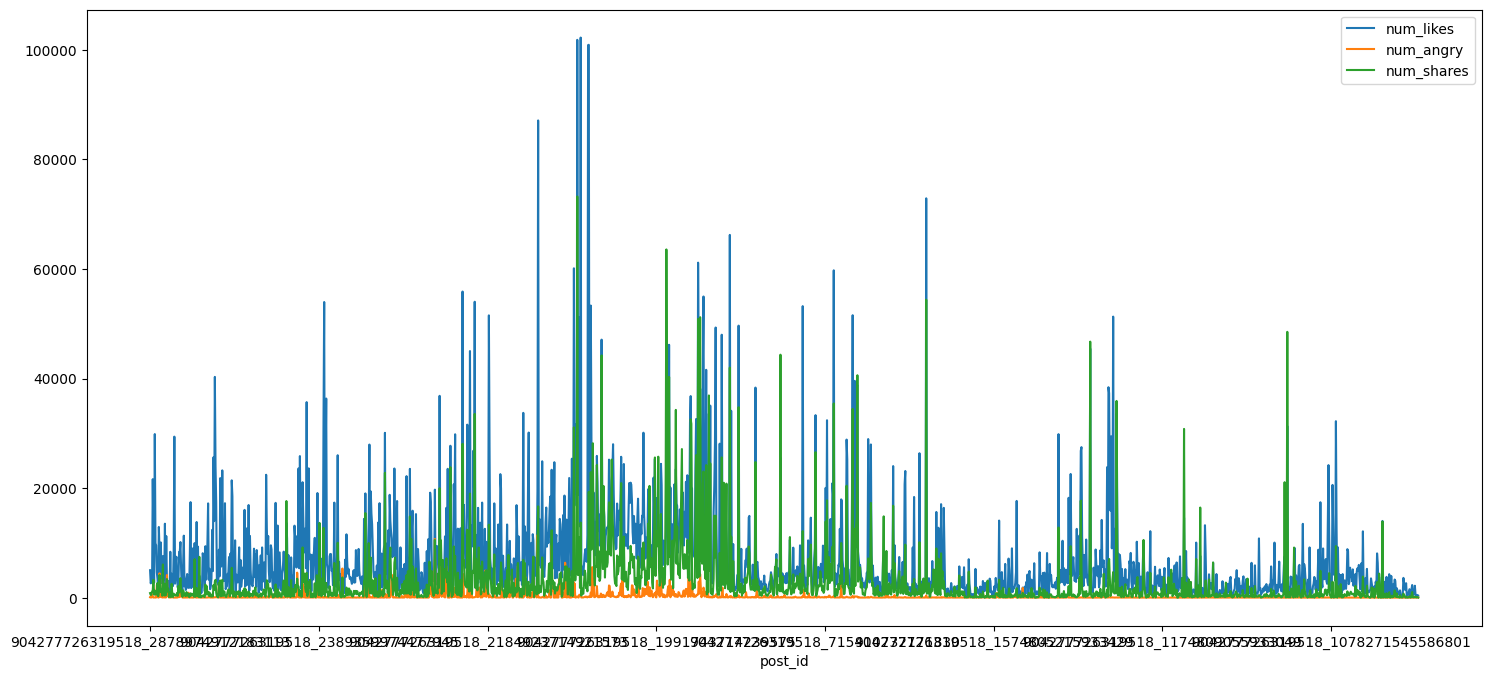

In [24]:
# Formato simplificado para plotar série temporal
series = pd.read_csv('posts_details_haddad.tsv', sep='\t', header=0, index_col=0, parse_dates=True)
series.plot()
plt.show()
